# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# 导入CIFAR10数据
由于实现了自定义的数据集，故直接导入

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: E:\DataSet
    Split: Train
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: E:\DataSet
    Split: Test


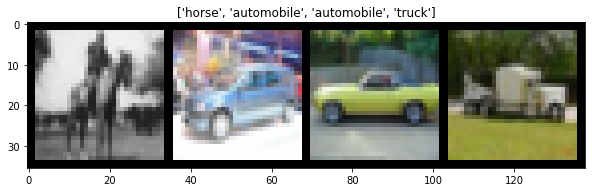

In [3]:
from MyPackages.CIFAT10_Dataset import CIFAR10, Int2Tensor
import os
import torchvision
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
root = os.environ['dataset']
# reference = torchvision.datasets.CIFAR10(root)
# print(reference)
# print(reference[1])

data_transform = transforms.ToTensor()
label2tensor = Int2Tensor()
train_data = CIFAR10(root, train=True, transform=data_transform, target_transform=label2tensor)
test_data = CIFAR10(root, train=False, transform=data_transform, target_transform=label2tensor)
print(train_data)
print(test_data)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# init the for layer convolution network with output 10 class
dataloaders = {"train": torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=0),
              "test": torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=True, num_workers=0)}

class_names = train_data.classes
class_to_idx = train_data.class_to_idx
inputs, classes = next(iter(dataloaders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

# 使用CIFAR10训练网络

In [ ]:
from MyPackages.ConvNets import ForLayerConvNet

net = ForLayerConvNet(10)
